In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import csv

%matplotlib inline

In [2]:
#Reading CSV files
csvpath_whales = Path("whale_returns.csv")
csvpath_algo = Path("algo_returns.csv")
csvpath_sp = Path("sp_tsx_history.csv")

#creating dataframe portfolio
whales_df = pd.read_csv(csvpath_whales, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(csvpath_algo, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df = pd.read_csv(csvpath_sp, index_col="Date", infer_datetime_format=True, parse_dates=True)

Whale Returns

In [3]:
# Reading whale returns
whales_df = whales_df.sort_index()
whales_df.head()

#Dropping null
whales_df = whales_df.dropna()
whales_df.head()

#datatypes
whales_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

Algorithmic Daily Returns

In [4]:
# Reading algorithmic returns
algo_df.head(10)

# Count nulls
algo_df.isnull().sum()

# Drop nulls
sp_df = sp_df.dropna()

S&P TSX 60 Returns

<ipython-input-5-7ac7c5a13017>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_df["Close"] = sp_df["Close"].str.replace("$", "")


,S&P Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


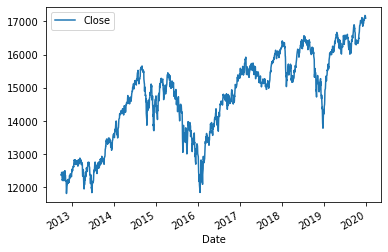

In [5]:
# Reading S&P TSX 60 Closing Prices
sp_df.head()

# Check Data Types
sp_df.dtypes

# Fix Data Types
sp_df["Close"] = sp_df["Close"].str.replace("$", "")
sp_df["Close"]
sp_df["Close"] = sp_df["Close"].str.replace(",", "")
sp_df["Close"]
sp_df.dtypes

#changing datatype to float
sp_df["Close"] = sp_df["Close"].astype("float")
sp_df.dtypes

#plotting S&P
sp_df.plot()

#calculating daily returns
daily_returns_sp = sp_df.pct_change()
daily_returns_sp.head()

# Rename `Close` Column to be specific to this portfolio.
columns = ["S&P Returns"]
daily_returns_sp.columns = columns
daily_returns_sp.head()

#dropping null values
daily_returns_sp = daily_returns_sp.dropna()
daily_returns_sp.head()

Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [6]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whales_df, algo_df, daily_returns_sp], axis = "columns", join = "inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


Performance Anlysis

<AxesSubplot:xlabel='Date'>

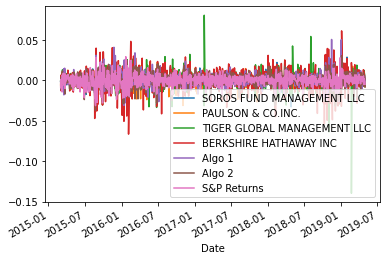

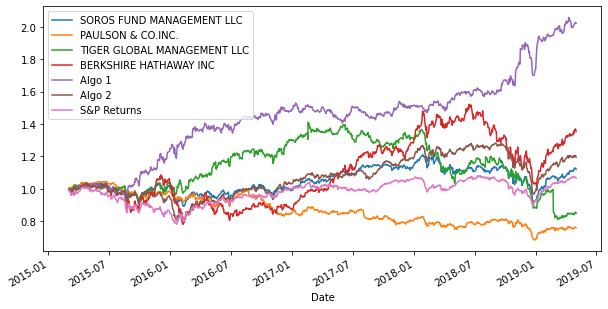

In [7]:
# Plot daily returns of all portfolios
combined_df.plot()

# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

Risk Analysis

SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
TIGER GLOBAL MANAGEMENT LLC    2.360896
BERKSHIRE HATHAWAY INC         3.125227
Algo 1                         4.108944
Algo 2                         1.851072
S&P Returns                    1.021582
dtype: float64

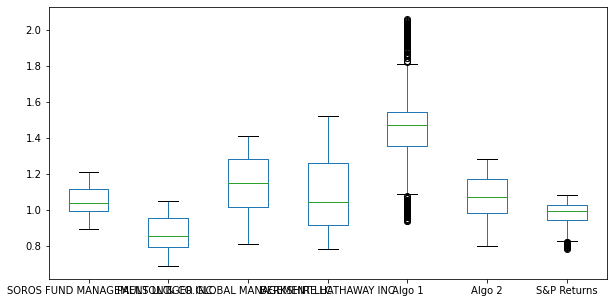

In [8]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(10,5))

# Calculate the daily standard deviations of all portfolios
daily_std = cumulative_returns.std()
daily_std.head(8)

# Calculate  the daily standard deviation of S&P TSX 60
daily_std_sp = daily_returns_sp.std()
daily_std_sp.head()
# Determine which portfolios are riskier than the S&P TSX 60
#every other portfolio as compared to S&P.....

# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(8)

Rolling Statistics

<AxesSubplot:title={'center':'EVM for 21 day rolling'}, xlabel='Date'>

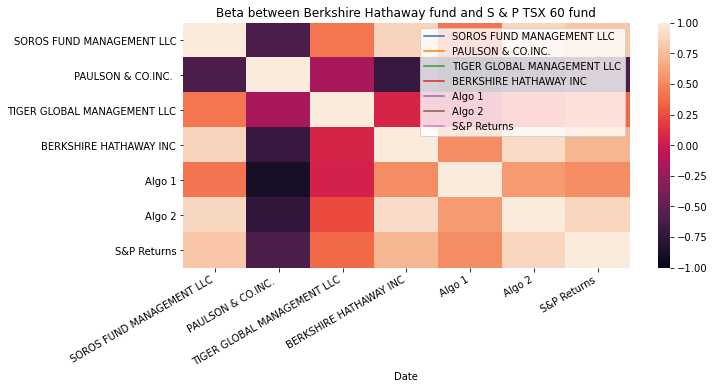

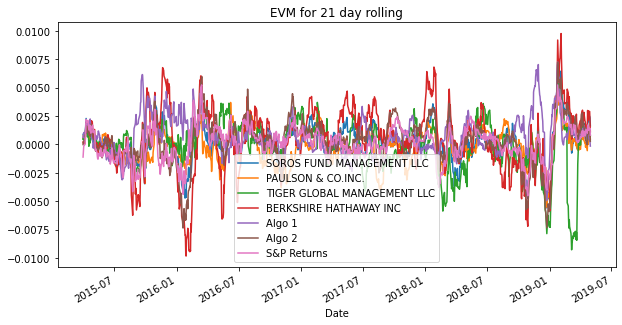

In [9]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window and Plot the rolling standard deviation
cumulative_returns.rolling(window=21).std().plot()

# Calculate the correlation
correlation = cumulative_returns.corr()
correlation
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

# Calculate covariance of a single portfolio
Cov_Tiger = cumulative_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window = 60).cov(cumulative_returns["S&P Returns"])
Cov_Tiger_1 = Cov_Tiger.dropna()

# Calculate variance of S&P TSX
vari = cumulative_returns["S&P Returns"].rolling(window = 60).var()
variance = vari.dropna()

# Computing beta for rolling 60 day against S&P TSX 60
Tiger_Beta = Cov_Tiger_1/variance
Tiger_Beta1 = Tiger_Beta.dropna()

# Plot beta trend
Tiger_Beta1.plot(figsize=(10, 5), title = "Beta between Berkshire Hathaway fund and S & P TSX 60 fund")

# Use `ewm` to calculate the rolling window
WR_evm_data = whales_df.rolling(window=21).mean()
ADR_evm_data = algo_df.rolling(window=21).mean()
SPTR_evm_data = daily_returns_sp.rolling(window=21).mean()
Jt_evm_data = pd.concat([WR_evm_data, ADR_evm_data, SPTR_evm_data], axis = "columns" )
Jt_evm_data1 = Jt_evm_data.dropna()
Jt_evm_data1.plot(figsize=(10, 5), title = "EVM for 21 day rolling")


Sharpe Ratios

<AxesSubplot:title={'center':'Sharpe Ratios'}>

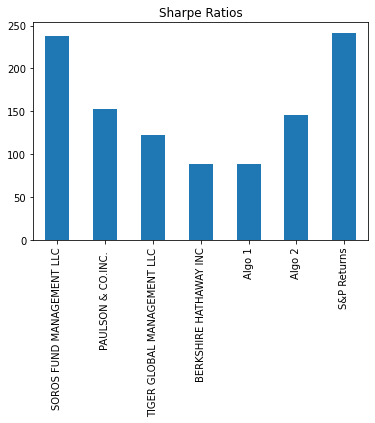

In [10]:
# Annualized Sharpe Ratios
sharpe_ratios = (cumulative_returns.mean() * 252) / (cumulative_returns.std() * np.sqrt(252))
sharpe_ratios

# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")


"Based on the Sharpe Ratios - the SOROS FUND MANAGEMENT LLC & S&P Returns strategy outperforms the whale portfolios"

Custom Portfolio

In [30]:
# Reading data from 1st stock
csvpath_apple = Path("apple.csv")
apple_df = pd.read_csv(csvpath_apple, index_col="Date", infer_datetime_format=True, parse_dates=True)

#count nulls
apple_df.isnull().sum()
apple_daily_returns = apple_df.pct_change()
apple_daily_returns = apple_daily_returns.rename(columns = {"Close":"Apple"})

# Reading data from 2nd stock
csvpath_tesla = Path("tesla.csv")
tesla_df = pd.read_csv(csvpath_tesla, index_col="Date", infer_datetime_format=True, parse_dates=True)

#count nulls
tesla_df.isnull().sum()
tesla_daily_returns = tesla_df.pct_change()
tesla_daily_returns = tesla_daily_returns.rename(columns = {"Close":"Tesla"})

# Reading data from 3rd stock
csvpath_microsoft = Path("microsoft.csv")
microsoft_df = pd.read_csv(csvpath_microsoft, index_col="Date", infer_datetime_format=True, parse_dates=True)

#count nulls
microsoft_df.isnull().sum()
microsoft_daily_returns = microsoft_df.pct_change()
microsoft_daily_returns = microsoft_daily_returns.rename(columns = {"Close":"Microsoft"})

In [31]:
# Combine all stocks in a single DataFrame
new_custom_df = pd.concat([apple_daily_returns, tesla_daily_returns, microsoft_daily_returns],axis = "columns")
new_custom_df.dropna()

,Apple,Tesla,Microsoft
Date,,,
2015-01-05,-0.028174,-0.041952,-0.009196
2015-01-06,0.000377,0.005712,-0.014677
2015-01-07,0.013925,-0.001656,0.012705
2015-01-08,0.038233,-0.001659,0.029418
2015-01-09,0.001073,-0.018756,-0.008405
...,...,...,...
2019-10-24,0.001645,0.176678,0.019674
2019-10-25,0.012315,0.094928,0.005645
2019-10-28,0.009895,-0.001371,0.024586


In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
CP_portfolio_returns = new_custom_df.dot(weights)

# Display sample data
CP_portfolio_returns.head()

Date
2015-01-02         NaN
2015-01-05   -0.026441
2015-01-06   -0.002863
2015-01-07    0.008325
2015-01-08    0.021997
dtype: float64

In [37]:
custom_daily_returns = pd.concat([CP_portfolio_returns, combined_df], axis="columns")
custom_daily_returns.columns = ["CUSTOM", "SOROS","PAULSON","TIGER","BERKSHIRE","ALGO 1","ALGO 2", "S&P"]

In [38]:
custom_daily_returns.dropna()

,CUSTOM,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,S&P
Date,,,,,,,,
2015-03-03,-0.000119,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.001088,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,-0.008177,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.016485,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000173,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...,...
2019-04-25,-0.006162,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.016474,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.009079,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [41]:
## Rerun risk analysis
# Calculate the annualized `std`
custom_all_STD = custom_daily_returns.std()*np.sqrt(252)
custom_all_STD


CUSTOM       0.241801
SOROS        0.124259
PAULSON      0.110841
TIGER        0.172759
BERKSHIRE    0.203599
ALGO 1       0.120470
ALGO 2       0.132177
S&P          0.111664
dtype: float64

In [42]:
# Calculate rolling standard deviation window of 21 days
custom_returns=custom_daily_returns.dropna()
custom_std = custom_returns.rolling(window=21).std()

<AxesSubplot:xlabel='Date'>

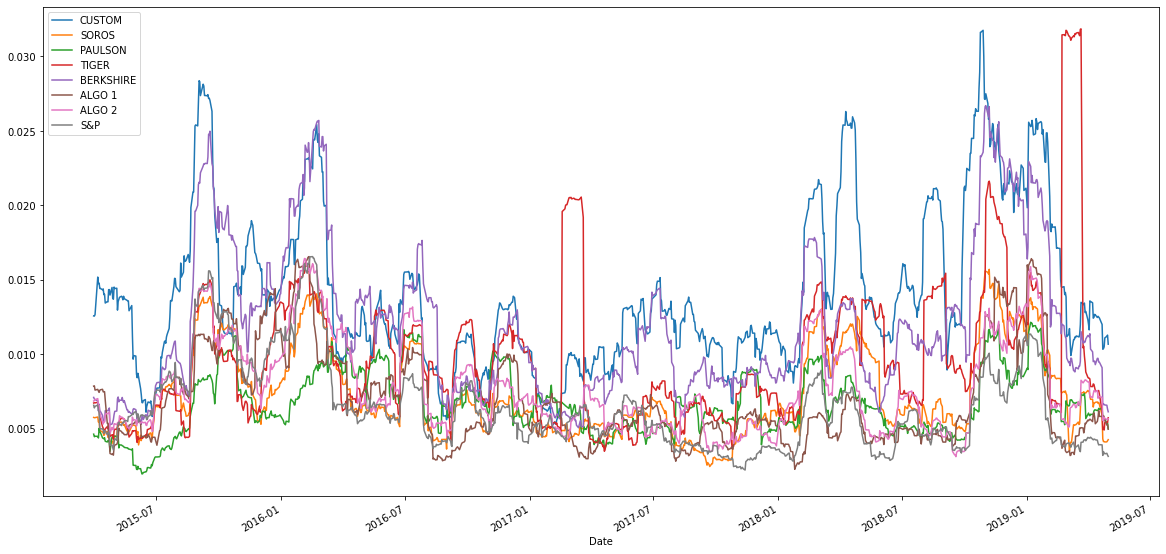

In [43]:
# Plot rolling standard deviation
custom_std.plot(figsize=(20, 10))

In [44]:
# Calculate and plot the correlation
custom_Corr = custom_returns.corr()
custom_Corr

,CUSTOM,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,S&P
CUSTOM,1.000000,0.595182,0.444134,0.426309,0.643671,0.204231,0.588959,0.480295
SOROS,0.595182,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON,0.444134,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER,0.426309,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE,0.643671,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
ALGO 1,0.204231,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
ALGO 2,0.588959,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P,0.480295,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

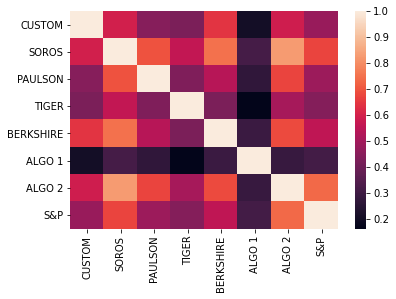

In [45]:
sns.heatmap(custom_Corr)

<AxesSubplot:title={'center':'Beta between Custom Portfolio and S & P TSX 60'}, xlabel='Date'>

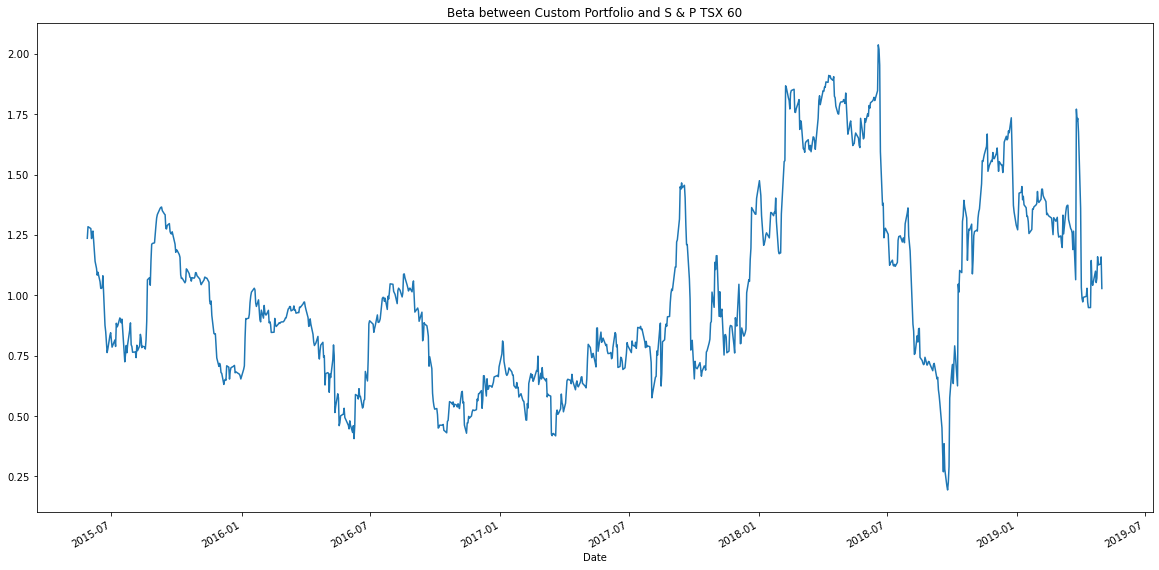

In [46]:
## Calc and plot 60 day rolling beta for custom portfolio to S&P 60 TSX
# Calculate and plot Beta
Cov_Custom = custom_returns['CUSTOM'].rolling(window = 60).cov(custom_returns["S&P"])
Cov_Custom_PF = Cov_Custom.dropna()

# Calculate variance of S&P TSX
vari_Custom = custom_returns["S&P"].rolling(window = 60).var()
vari_Custom_PF = vari_Custom.dropna()

# Computing beta for rolling 60 day against S&P TSX 60
Custom_Beta = Cov_Custom_PF/vari_Custom_PF
Custom_Beta_1 = Custom_Beta.dropna()

# Plot beta trend
Custom_Beta_1.plot(figsize=(20, 10), title = "Beta between Custom Portfolio and S & P TSX 60")

In [47]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (custom_daily_returns.mean() * 252) / (custom_daily_returns.std() * np.sqrt(252))
sharpe_ratio

CUSTOM       0.877373
SOROS        0.286709
PAULSON     -0.547594
TIGER       -0.144455
BERKSHIRE    0.467045
ALGO 1       1.491514
ALGO 2       0.396817
S&P          0.195550
dtype: float64

<AxesSubplot:>

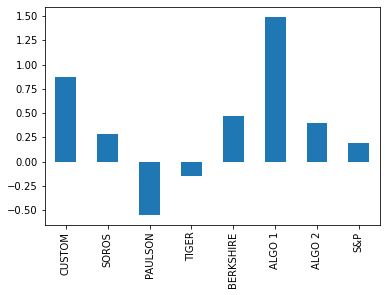

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

In [ ]:
### How does your portfolio do?
## The custom portfolio that I selected was better to Paulson and Tiger, Algo 1 peformed better than Custom stock that i chose.